In [17]:
from environments import MountainCar
from features import LinearFeatureMap
import numpy as np
from tqdm.notebook import tqdm
from joblib import Parallel, delayed
import scipy as sc
import timeit
import copy
import matplotlib.pyplot as plt
from fitted_q import FittedQIteration
from utils import get_data, evaluate_policy, run_experiment, move_successful_trajectories, truncate_data, run_experiment2

In [18]:
data = [20000, 15000, 10000, 5000, 1000]
H = 600
runs = 16
c = []
num_trials = data[-1]
'''
tuples = []
for i in tqdm(range(runs)):
    tup = get_data(H,num_trials)
    tuples.append(move_successful_trajectories(tup, H))
'''

'\ntuples = []\nfor i in tqdm(range(runs)):\n    tup = get_data(H,num_trials)\n    tuples.append(move_successful_trajectories(tup, H))\n'

In [19]:
phi = LinearFeatureMap()
phi.init_fourier_features(2,2)
phi.init_state_normalizers(np.array([0.6,0.07]),np.array([-1.2,-0.07]))
for i in tqdm(range(len(data))):
    tic = timeit.default_timer()
    x = Parallel(n_jobs=8)(delayed(run_experiment)(H, data[i], phi, 1) for j in tqdm(range(runs)))
    toc = timeit.default_timer()
    print('Time: %ss' %(toc-tic))
    c.append(x)
        

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Time: 592.777346656s


  0%|          | 0/16 [00:00<?, ?it/s]

Time: 432.92583537200017s


  0%|          | 0/16 [00:00<?, ?it/s]

Time: 314.4346587969999s


  0%|          | 0/16 [00:00<?, ?it/s]

Time: 217.54405573800022s


  0%|          | 0/16 [00:00<?, ?it/s]

Time: 106.42482667800004s


In [21]:
costs_log = np.zeros(len(data))
costs_sq = np.zeros(len(data))
c_log = np.zeros((len(data),runs))
c_sq = np.zeros((len(data),runs))
for i in range(len(data)):
    for j in range(len(c[i])):
        c_log[i,j] = c[i][j][0][0]
        c_sq[i,j] = c[i][j][1]
        costs_log[i] += c[i][j][0][0]
        costs_sq[i] += c[i][j][1]

err_log = sc.stats.sem(c_log.T)
err_sq = sc.stats.sem(c_sq.T)

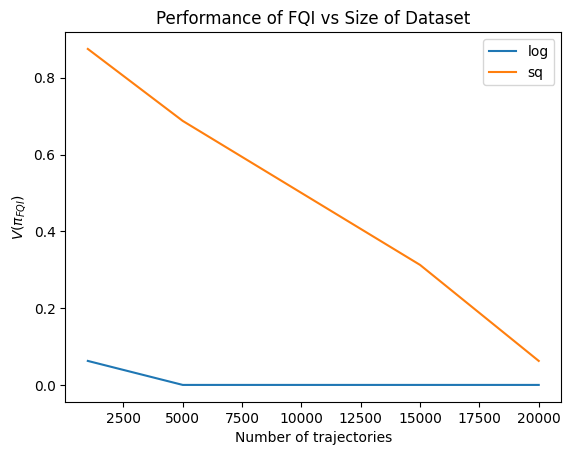

In [22]:


plt.plot(data, costs_log / runs, label = 'log')
plt.plot(data, costs_sq / runs, label='sq')
plt.xlabel('Number of trajectories')
plt.ylabel('$V(\pi_{FQI})$')
plt.title('Performance of FQI vs Size of Dataset')
plt.legend()
plt.show()

In [ ]:
with open(r'data_n_traj.txt', 'w') as fp:
    for item in tuples:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')
np.save('costs_sq_n_traj.npy', c_sq)
np.save('costs_log_n_trac.npy', c_log)

In [ ]:
costs_log

In [ ]:
costs_sq